In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Traiter le dataset scrappé

In [4]:
scrapped_file = pd.read_csv('/content/drive/MyDrive/M1/S2/DALAS/Projet/scrapped_en.tsv', sep='\t')

In [6]:
scrapped_file.columns

Index(['Unnamed: 0', 'Tconst du film', 'Titre du film', 'Jour de sortie',
       'Mois de sortie', 'Année de sortie', 'Durée', 'Pays', 'Langage',
       'Budget min', 'Budget max', 'Box office min', 'Box office max'],
      dtype='object')

In [109]:
real_file = scrapped_file.drop(['Unnamed: 0', 'Tconst du film', 'Titre du film', 'Budget min' ,'Box office min'], axis=1)

In [110]:
real_file = real_file.rename(columns={'Budget max': 'Budget', 'Box office max' : 'Box office'})

In [111]:
real_file

,Jour de sortie,Mois de sortie,Année de sortie,Durée,Pays,Langage,Budget,Box office
0,\N,\N,1894,\N,United States,Silent,\N,\N
1,28,10,1892,15,France,Silent,\N,\N
2,28,10,1892,15,France,Silent,\N,\N
3,09,05,1893,\N,United States,Silent,\N,\N
4,\N,\N,1894,\N,United States,Silent,\N,\N
...,...,...,...,...,...,...,...,...
29468,\N,\N,\N,\N,\N,Korean,\N,\N
29469,12,12,1968,89,West GermanyItalyYugoslavia,German,\N,\N
29470,20,12,1968,25,United States,English,\N,\N
29471,14,08,1968,130,Japan,Japanese,300000000.0,400000000.0


In [112]:
def index_line_without_value(series): # Renvoie les index des lignes où il y a \\N pour valeur
  return series[series == "\\N"]

In [170]:
real_file = real_file.drop(index=index_line_without_value(real_file["Jour de sortie"]).index)
real_file = real_file.drop(index=index_line_without_value(real_file["Mois de sortie"]).index)
real_file = real_file.drop(index=index_line_without_value(real_file["Année de sortie"]).index)
real_file = real_file.drop(index=index_line_without_value(real_file["Durée"]).index)
real_file = real_file.drop(index=index_line_without_value(real_file["Pays"]).index)
real_file = real_file.drop(index=index_line_without_value(real_file["Langage"]).index)
real_file = real_file.drop(index=index_line_without_value(real_file["Budget"]).index)
real_file = real_file.drop(index=index_line_without_value(real_file["Box office"]).index)

In [172]:
# Cas particulier : il y a des lignes où le jour et l'année ont été inversés (la valeur de l'une est dans la colonne de l'autre)

for index, row in real_file.iterrows():
  if len(row["Jour de sortie"]) > 2:
    jour = row["Année de sortie"]
    row["Année de sortie"] = row["Jour de sortie"]
    row["Jour de sortie"] = jour

In [173]:
real_file

,Jour de sortie,Mois de sortie,Année de sortie,Durée,Pays,Langage,Budget,Box office
17400,02,04,1942,103,Austria (part of Greater Germany),German,700000.0,0.000000e+00
27633,16,09,1964,95,United States,English,592000.0,3.000000e+00
27660,22,03,1965,97,UkrSSR,Ukrainian,300500.0,5.000000e+00
18260,20,07,1944,172,United States,English,3257000.0,7.000000e+00
24303,02,05,1957,83,United Kingdom,English,65000.0,8.000000e+00
...,...,...,...,...,...,...,...,...
21125,22,12,1950,107,United States,English,1632000.0,2.890000e+14
17848,25,09,1943,127,United States,English,1568000.0,3.621000e+14
21470,26,07,1951,95,United States,English,1194000.0,3.730000e+14
20745,30,12,1950,94,United States,English,1390000.0,4.490000e+14


# Visualiser les distributions de chaque variable

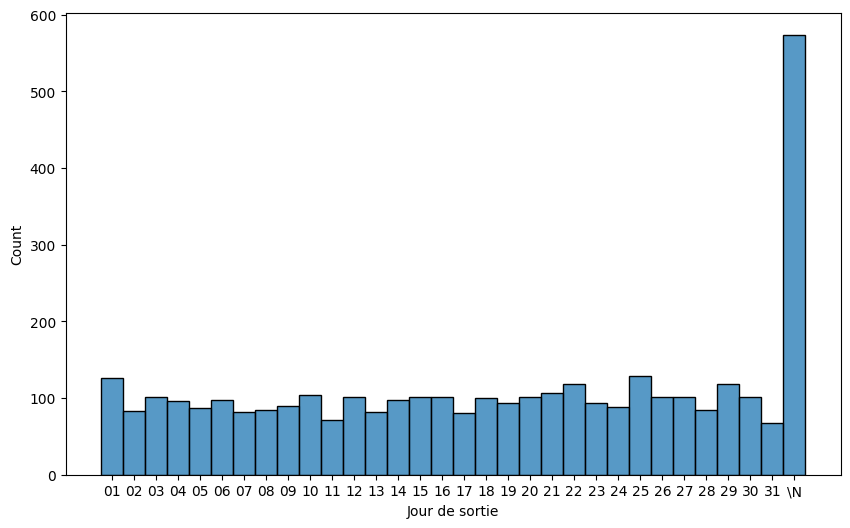

In [55]:
plt.figure(figsize=(10,6))
sns.histplot(data=real_file.sort_values(by=["Jour de sortie"])["Jour de sortie"])
plt.show()

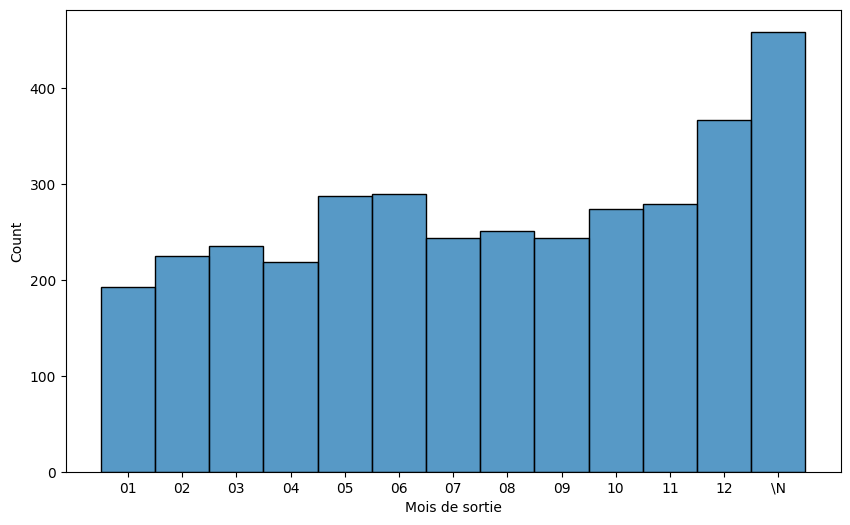

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(data=real_file.sort_values(by=["Mois de sortie"])["Mois de sortie"])
plt.show()

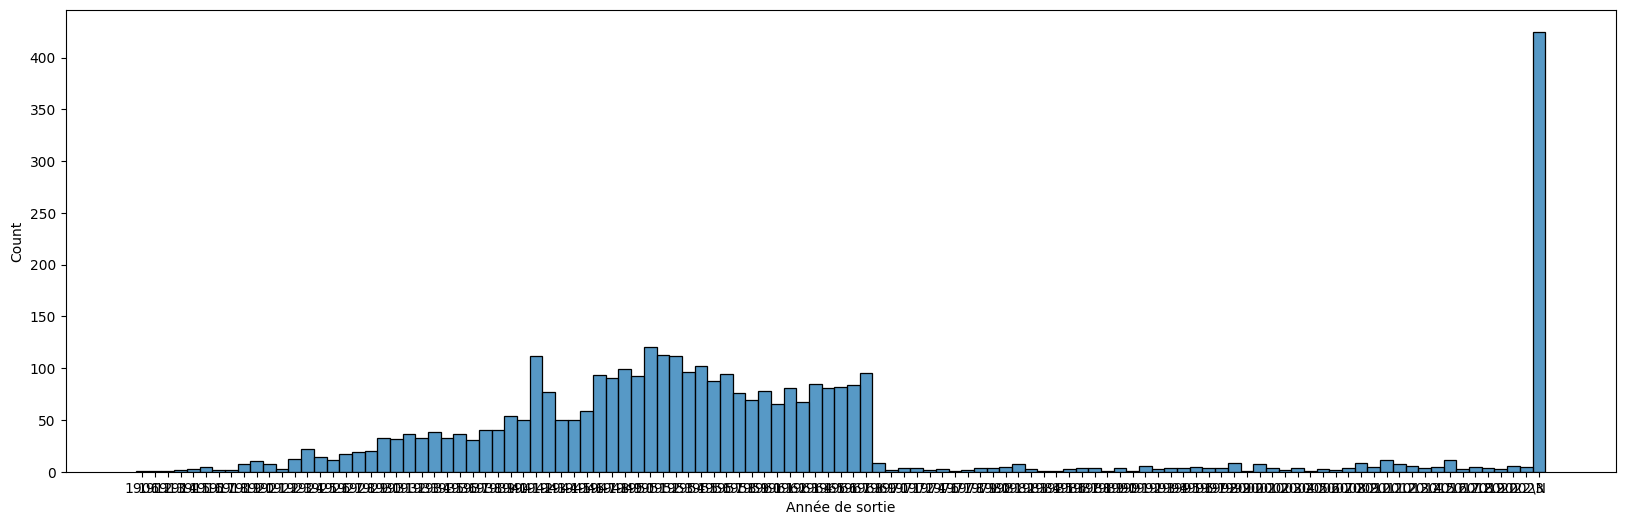

In [60]:
plt.figure(figsize=(20,6))
sns.histplot(data=real_file.sort_values(by=["Année de sortie"])["Année de sortie"])
plt.show()

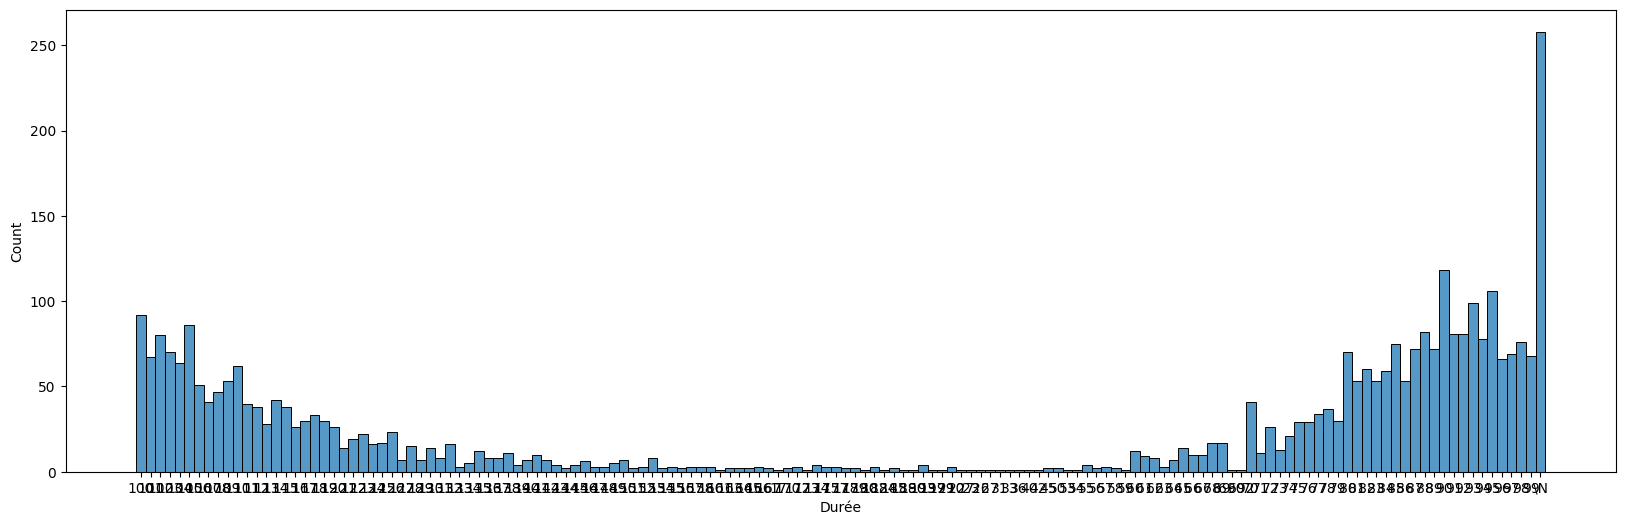

In [62]:
plt.figure(figsize=(20,6))
sns.histplot(data=real_file.sort_values(by=["Durée"])["Durée"])
plt.show()

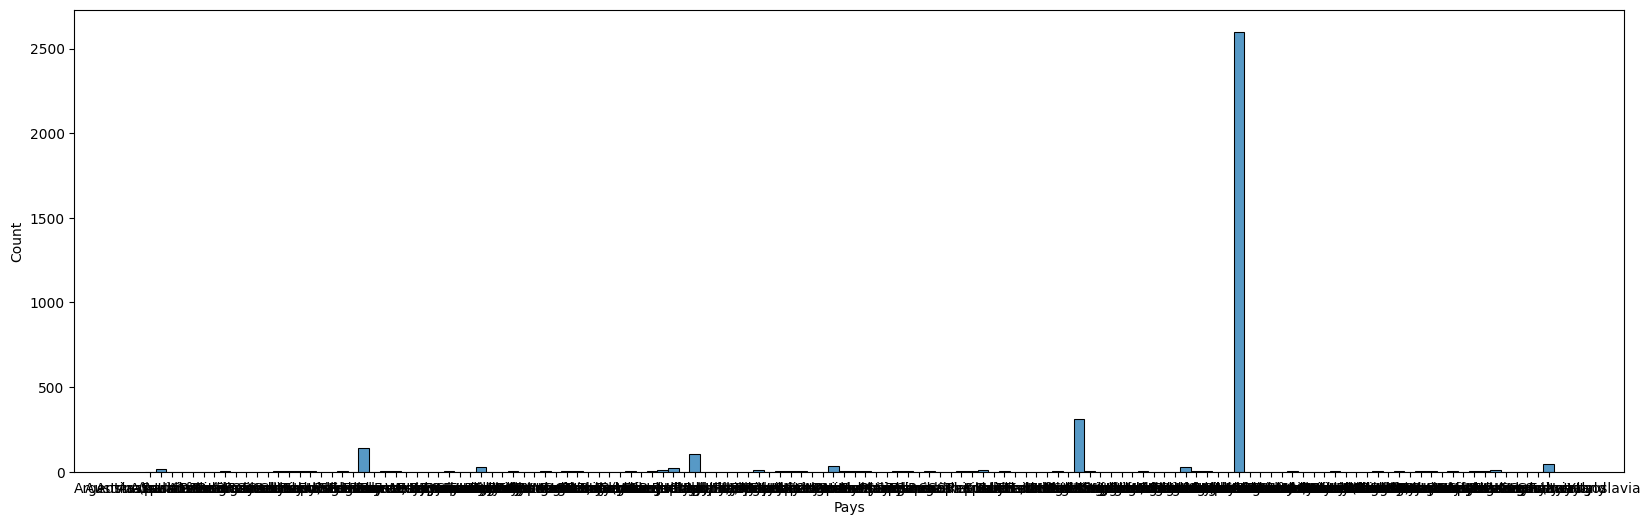

In [63]:
plt.figure(figsize=(20,6))
sns.histplot(data=real_file.sort_values(by=["Pays"])["Pays"])
plt.show()

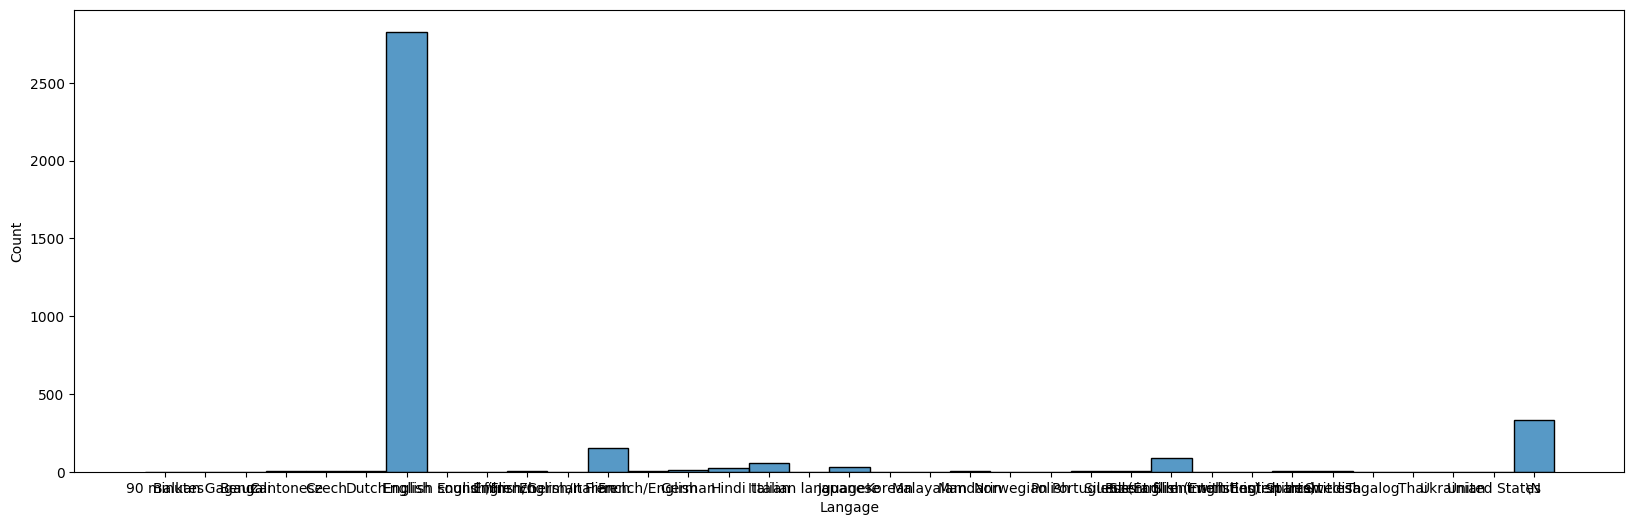

In [64]:
plt.figure(figsize=(20,6))
sns.histplot(data=real_file.sort_values(by=["Langage"])["Langage"])
plt.show()

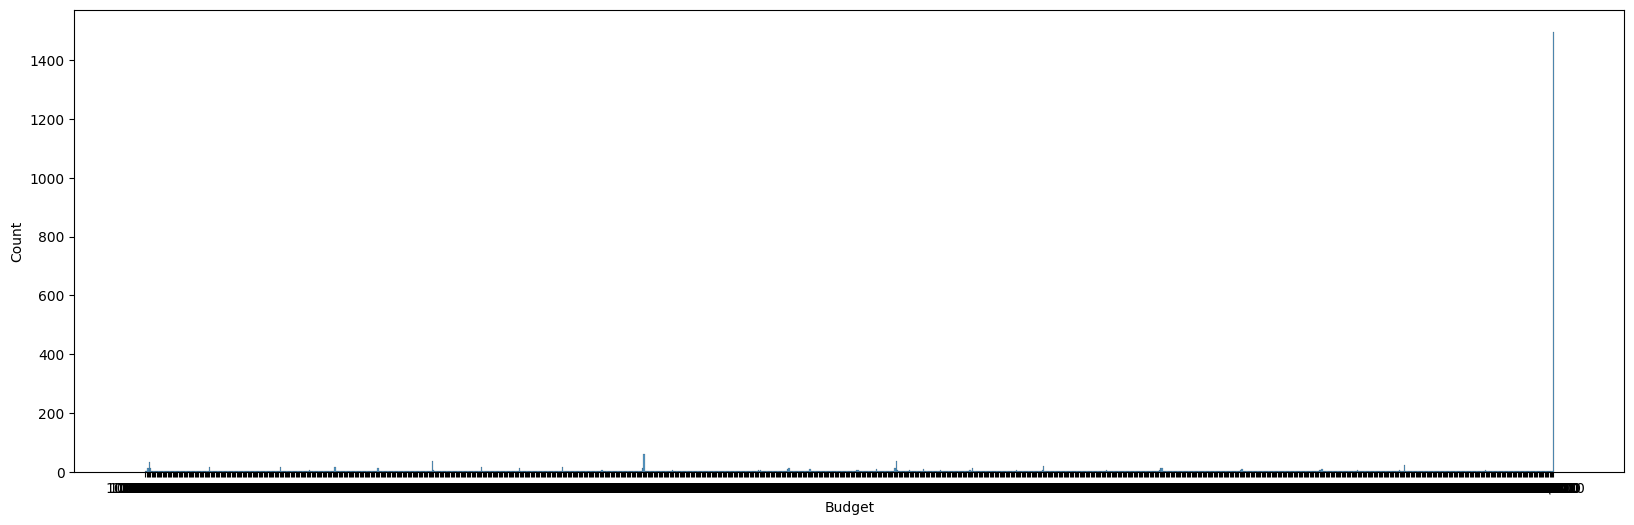

In [65]:
plt.figure(figsize=(20,6))
sns.histplot(data=real_file.sort_values(by=["Budget"])["Budget"])
plt.show()

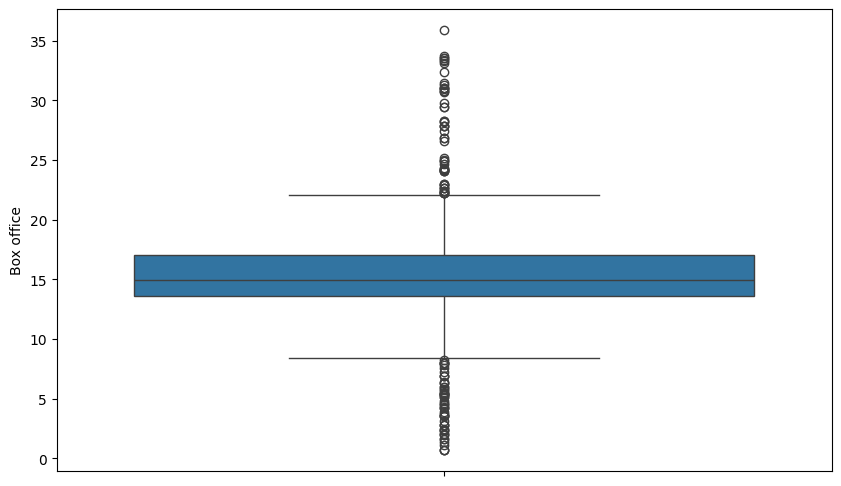

In [134]:
plt.figure(figsize=(10,6))
sns.boxplot(data=real_file["Box office"].apply(np.log))
plt.show()

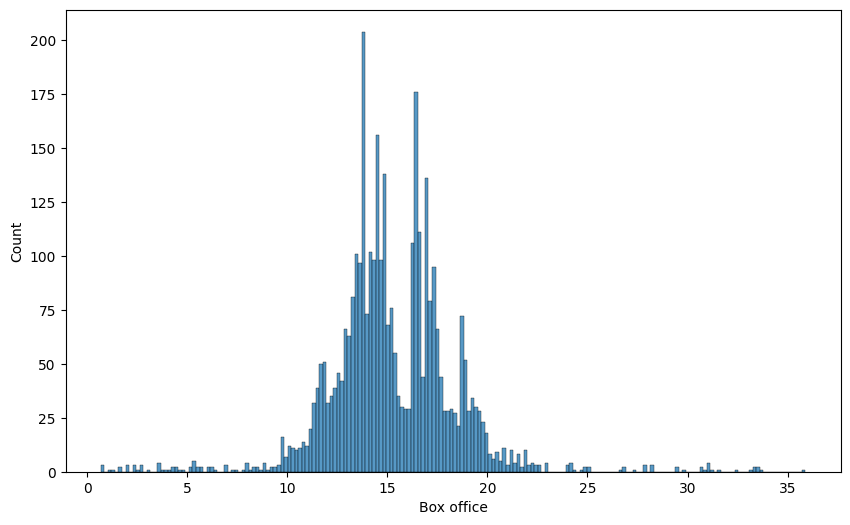

In [145]:
plt.figure(figsize=(10,6))
sns.histplot(data=real_file["Box office"].apply(np.log), bins=200)
plt.show()

# Corrélation entre le box office (=target y) et les autres variables (=features)

In [174]:
import copy

In [ ]:
file_budget = copy.deepcopy(real_file)

In [149]:
file_budget["Budget"] = file_budget["Budget"].astype("float64").apply(np.log)
file_budget["Box office"] = file_budget["Box office"].astype("float64").apply(np.log)

In [131]:
file_budget

,Jour de sortie,Mois de sortie,Année de sortie,Durée,Pays,Langage,Budget,Box office
17400,02,04,1942,103,Austria (part of Greater Germany),German,700000.0,0.000000e+00
16069,\N,\N,\N,100,Nazi Germany,German,100000.0,0.000000e+00
19025,10,12,1946,126,Italy,\N,6000000.0,0.000000e+00
27633,16,09,1964,95,United States,English,592000.0,3.000000e+00
27660,22,03,1965,97,UkrSSR,Ukrainian,300500.0,5.000000e+00
...,...,...,...,...,...,...,...,...
17737,13,11,1943,93,United States,\N,1290000.0,3.252000e+14
17848,25,09,1943,127,United States,English,1568000.0,3.621000e+14
21470,26,07,1951,95,United States,English,1194000.0,3.730000e+14
20745,30,12,1950,94,United States,English,1390000.0,4.490000e+14


In [96]:
file_budget = file_budget.sort_values(by=["Budget","Box office"], ascending=True)

In [97]:
file_budget

,Jour de sortie,Mois de sortie,Année de sortie,Durée,Pays,Langage,Budget,Box office
27321,25,11,1994,141,India,Hindi,-inf,5.493061
19769,\N,\N,\N,88,United States,English,-0.366513,16.860033
27770,19,08,1966,\N,India,Malayalam,0.732099,3.688879
17123,10,07,1942,88,United States,English,0.874591,13.815511
9680,20,03,1928,87,United States,\N,0.996229,2.772589
...,...,...,...,...,...,...,...,...
14498,24,05,1938,106,United States,English,3.405054,17.399029
8242,24,05,1938,106,United States,English,3.405054,17.399029
10594,24,05,1938,106,United States,English,3.405054,17.399029
10171,23,02,1929,100,United States,\N,3.508752,32.388913


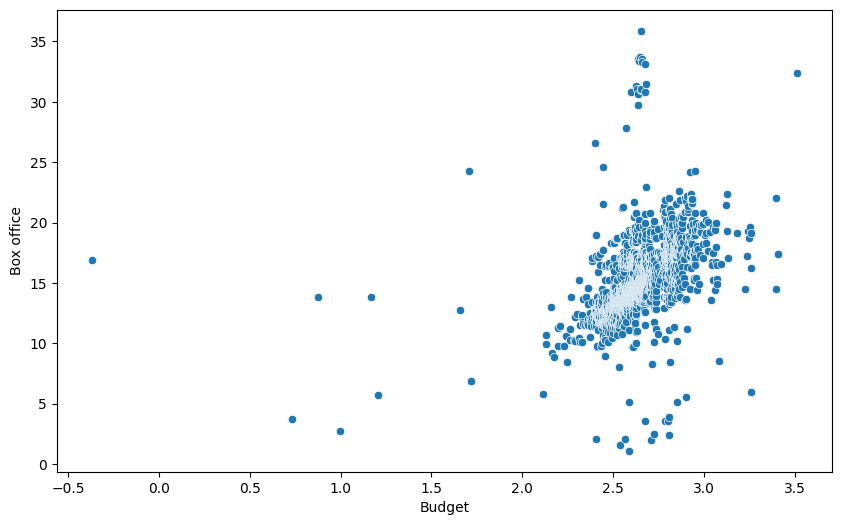

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=file_budget, x="Budget", y="Box office")
plt.show()

In [120]:
real_file["Box office"] = real_file["Box office"].astype("float64")
real_file = real_file.sort_values(by=["Box office"], ascending=True)

In [121]:
real_file

,Jour de sortie,Mois de sortie,Année de sortie,Durée,Pays,Langage,Budget,Box office
17400,02,04,1942,103,Austria (part of Greater Germany),German,700000.0,0.000000e+00
16069,\N,\N,\N,100,Nazi Germany,German,100000.0,0.000000e+00
26558,\N,\N,\N,\N,Soviet Union,Russian,\N,0.000000e+00
19025,10,12,1946,126,Italy,\N,6000000.0,0.000000e+00
27244,05,04,1963,149,India,Hindi,\N,2.000000e+00
...,...,...,...,...,...,...,...,...
17737,13,11,1943,93,United States,\N,1290000.0,3.252000e+14
17848,25,09,1943,127,United States,English,1568000.0,3.621000e+14
21470,26,07,1951,95,United States,English,1194000.0,3.730000e+14
20745,30,12,1950,94,United States,English,1390000.0,4.490000e+14


In [146]:
scipy.stats.shapiro(real_file["Box office"])

ShapiroResult(statistic=0.008806884288787842, pvalue=0.0)

In [153]:
file_jour = copy.deepcopy(real_file)

In [154]:
file_jour["Jour de sortie"] = file_jour["Jour de sortie"].astype("float64")
file_jour["Box office"] = file_jour["Box office"].astype("float64")

In [155]:
scipy.stats.kruskal(file_jour["Box office"], file_jour["Jour de sortie"])

KruskalResult(statistic=4420.162953578453, pvalue=0.0)

In [157]:
file_langage = copy.deepcopy(real_file)

In [163]:
file_langage["Box office"] = file_langage["Box office"].astype("float64")
file_langage["Langage"] = file_langage["Langage"].astype('category')
file_langage['langage_code'] = file_langage["Langage"].cat.codes

In [164]:
file_langage

,Jour de sortie,Mois de sortie,Année de sortie,Durée,Pays,Langage,Budget,Box office,langage_code
17400,02,04,1942,103,Austria (part of Greater Germany),German,700000.0,0.000000e+00,13
16069,\N,\N,\N,100,Nazi Germany,German,100000.0,0.000000e+00,13
26558,\N,\N,\N,\N,Soviet Union,Russian,\N,0.000000e+00,24
27244,05,04,1963,149,India,Hindi,\N,2.000000e+00,14
25826,\N,\N,\N,\N,India,Hindi,\N,2.000000e+00,14
...,...,...,...,...,...,...,...,...,...
21125,22,12,1950,107,United States,English,1632000.0,2.890000e+14,6
17848,25,09,1943,127,United States,English,1568000.0,3.621000e+14,6
21470,26,07,1951,95,United States,English,1194000.0,3.730000e+14,6
20745,30,12,1950,94,United States,English,1390000.0,4.490000e+14,6


In [165]:
scipy.stats.kruskal(file_langage["Box office"], file_langage["langage_code"])

KruskalResult(statistic=5223.201217679101, pvalue=0.0)

<Axes: >

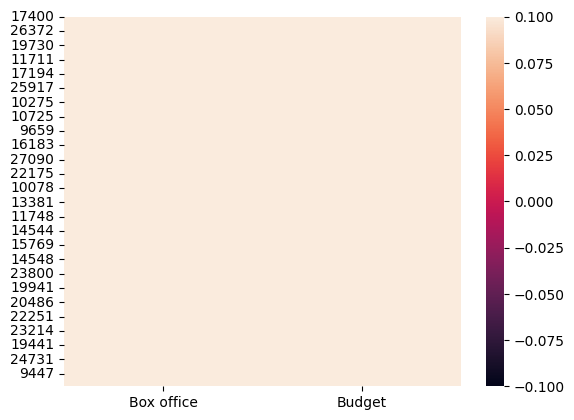

In [169]:
sns.heatmap(file_budget[["Box office", "Budget"]])